# Task 1: Dataset Selection & Understanding


In [38]:
#Loading the CSV File

import pandas as pd  

# Load the CSV file (Replace 'your_file.csv' with your actual file path)
df = pd.read_csv("Global_Health_Statistics.csv")  

# Display the first few rows
print(df.head())  


     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58      Medication  

<h3>Describing the Dataset</h3>

<h4>What is the domain of the dataset? (e.g., healthcare, finance, transport)
</h4>

The dataset falls under the healthcare domain as it contains information about diseases, prevalence rates, incidence rates, mortality, healthcare access, treatments, and recovery rates.

<h4>What is the target variable?
</h4>

We can use any target variable we want like Morality Rate, Healthcare Access, Recovery Rate etc.
But I will choose Morality Rate as my Target Variable.

<h4>Number of features and records</h4>

There are 22 features, including country, year, disease name, prevalence rate, treatment type, recovery rate, etc.

<h4>Type of problem (Regression or Classification?)</h4>

If predicting Mortality Rate (%) it's a Regression problem since it has continuous values.

<h3>Explaining the Target Value (Morality Rate)</h3>

Mortality refers to the number of deaths due to a specific disease within a population over a period of time.
<br>
<br>
Mortality Rate = (Number of Deaths / Total Population) × 100<br>
If 5,000 out of 1,000,000 people die due to a disease in a year, the mortality rate is 0.5%.

# Task 2: Exploratory Data Analysis (EDA)

<h2>Perform data visualization</h2>

<h3>Histograms for numeric features</h3>

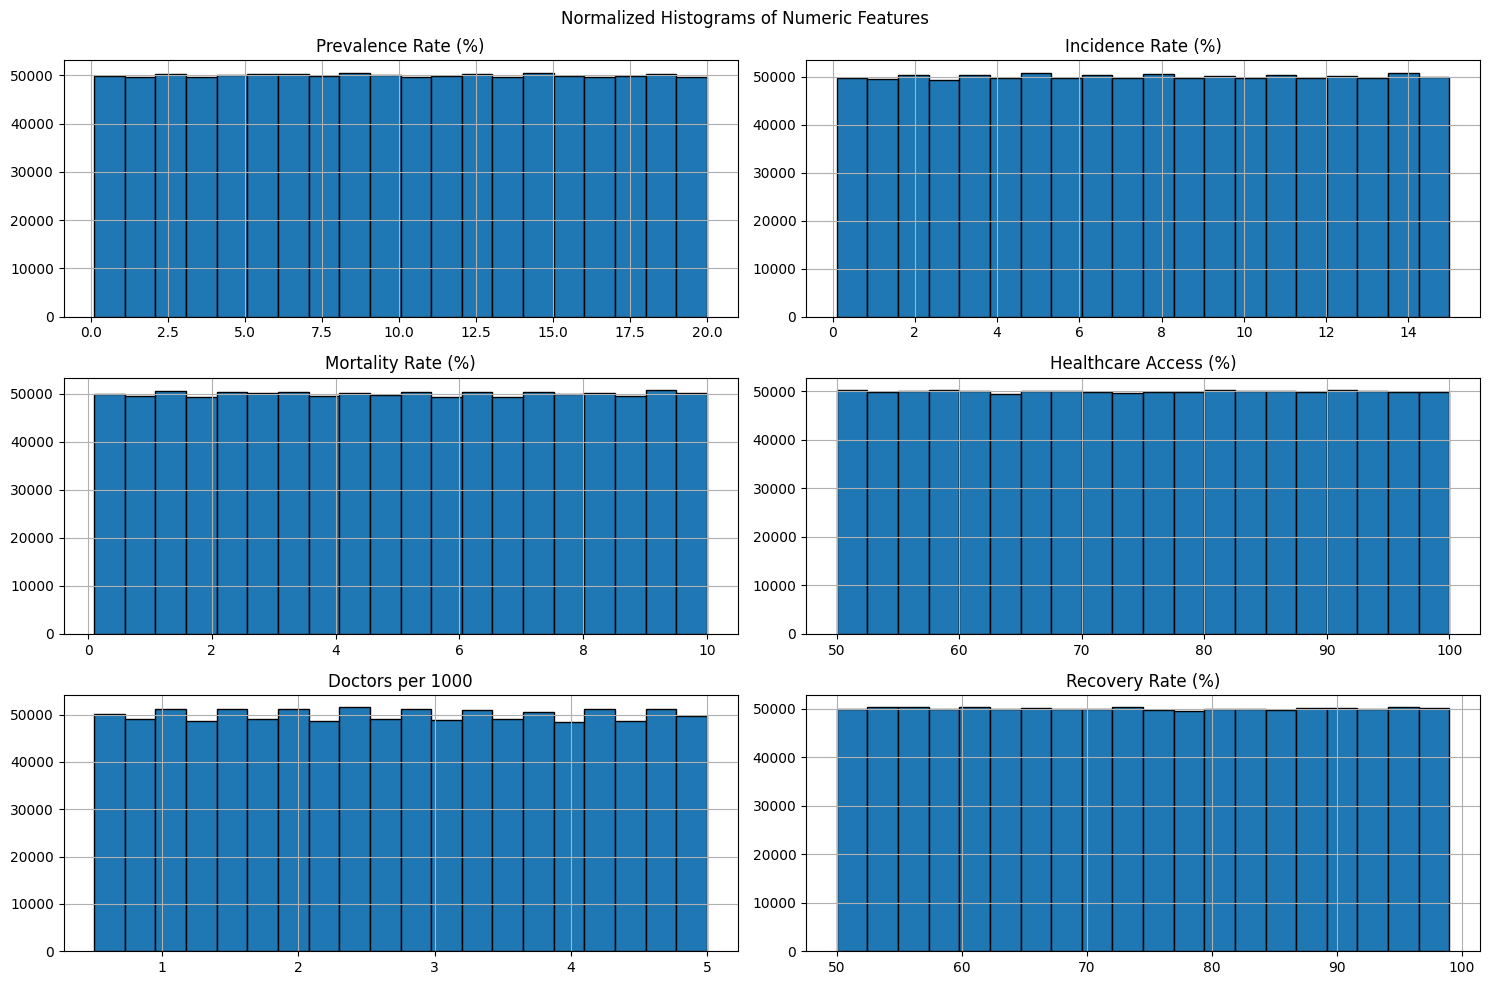

In [39]:

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalize numeric features
#scaler = MinMaxScaler()
# List of numeric features to plot
numeric_features = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Healthcare Access (%)', 'Doctors per 1000', 'Recovery Rate (%)']
#df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Plot histograms again
df[numeric_features].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Normalized Histograms of Numeric Features')
plt.tight_layout()
plt.show()

In the above examples of Histogram, the headings of the graphs actually tell us about the y-axis values, eg Recovery Rate, Morality Rate they are on the y-axis of the histogram. 
The x-axis however tell us about the no of records that fall into that category. If we look at the Doctors per Thousand it tells that from 0.0 to 0.05 more that 50,000 records fall in that category, from 0.25 to 0.3 almost 55,000 fall in that category and so on.

These Histograms also tell us that the distribution is more or less even. 

<h2>Interpreting Each Histogram</h2>


<h3>1. Prevalence Rate (%)</h3>
X-axis: Range of prevalence rates (e.g., 0% to 20%).

Y-axis: Number of records (or frequency) with prevalence rates in each bin.

Interpretation:

If the histogram is right-skewed, it means most countries have low prevalence rates, with a few outliers having very high rates.

If it’s bell-shaped, it means prevalence rates are normally distributed around a central value.

<h3>2. Incidence Rate (%)</h3>
X-axis: Range of incidence rates (e.g., 0% to 15%).

Y-axis: Number of records with incidence rates in each bin.

Interpretation:

A left-skewed distribution indicates that most countries have high incidence rates, with a few having very low rates.

A uniform distribution means incidence rates are evenly spread across the range.

<h3>3. Mortality Rate (%)</h3>
X-axis: Range of mortality rates (e.g., 0% to 10%).

Y-axis: Number of records with mortality rates in each bin.

Interpretation:

A peak at low mortality rates (e.g., 0-2%) indicates that most countries have low mortality rates for the disease.

A long tail on the right suggests a few countries have very high mortality rates.

<h3>4. Healthcare Access (%)</h3>
X-axis: Range of healthcare access percentages (e.g., 50% to 100%).

Y-axis: Number of records with healthcare access percentages in each bin.

Interpretation:

A right-skewed distribution means most countries have high healthcare access, with a few having very low access.

A bimodal distribution (two peaks) might indicate two distinct groups of countries (e.g., developed vs. developing).

<h3>5. Doctors per 1000</h3>
X-axis: Range of the number of doctors per 1000 people (e.g., 0 to 10).

Y-axis: Number of records with doctors per 1000 in each bin.

Interpretation:

A left-skewed distribution indicates most countries have a high number of doctors per 1000 people, with a few having very low numbers.

A normal distribution suggests that the number of doctors per 1000 is evenly distributed around a central value.

<h3>6. Recovery Rate (%)</h3>
X-axis: Range of recovery rates (e.g., 50% to 100%).

Y-axis: Number of records with recovery rates in each bin.

Interpretation:

A peak at high recovery rates (e.g., 90-100%) indicates that most countries have high recovery rates for the disease.

A left-skewed distribution suggests that recovery rates are generally high, with a few outliers having low rates.




<h2>Scatter Plot and Corelation Matrix</h2>

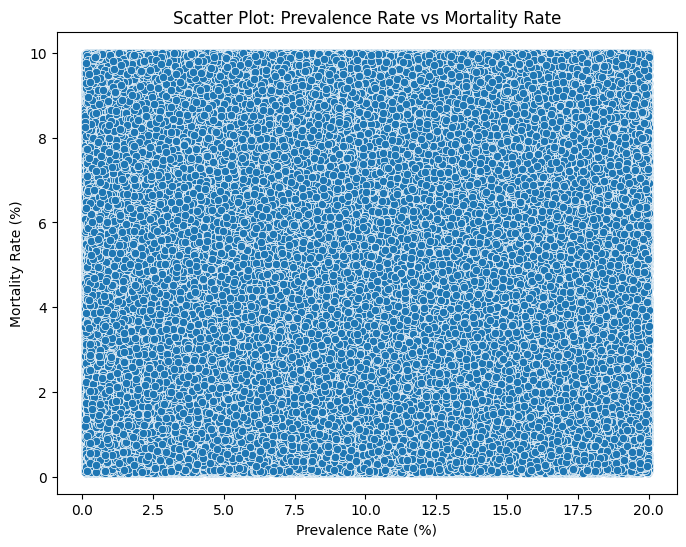

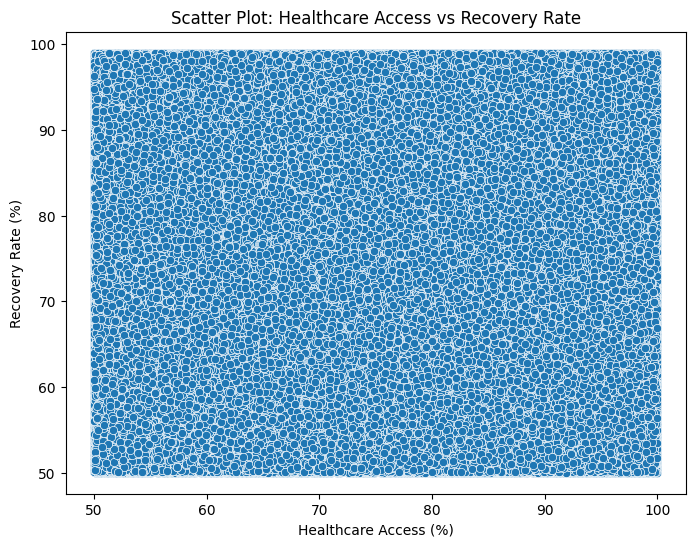

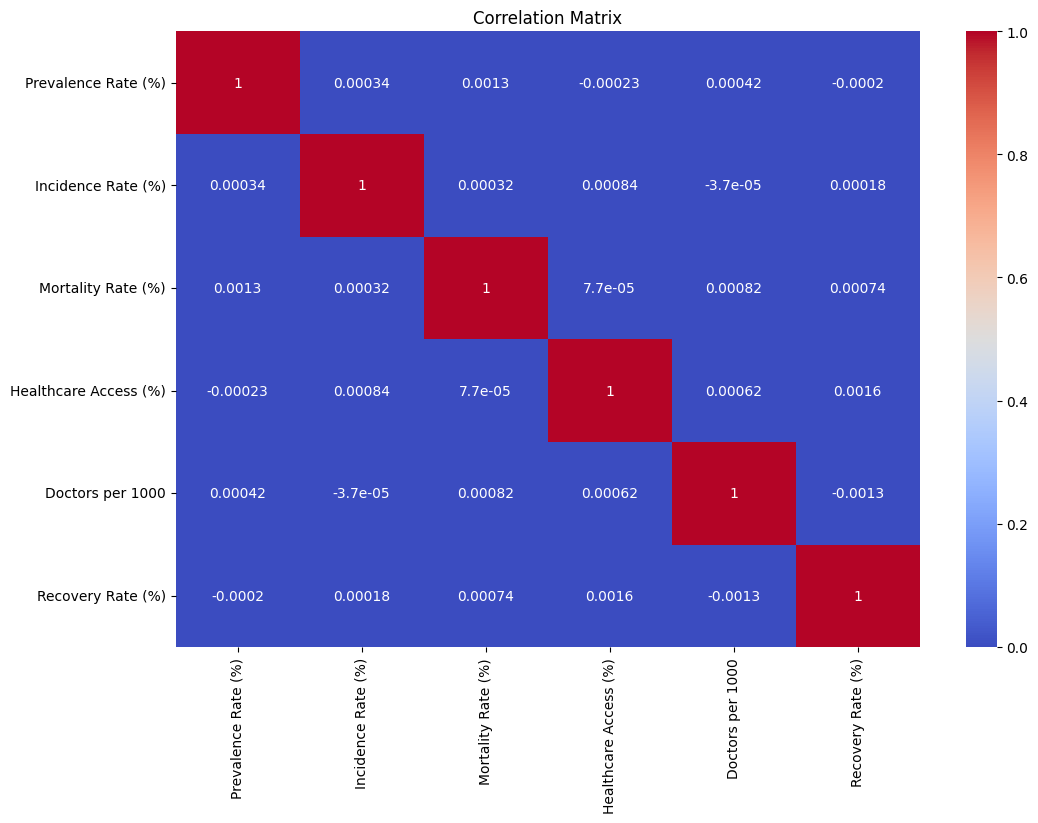

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Prevalence Rate vs Mortality Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Prevalence Rate (%)', y='Mortality Rate (%)', data=df)
plt.title('Scatter Plot: Prevalence Rate vs Mortality Rate')
plt.show()


# Scatter plot: Healthcare Access vs Recovery Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Healthcare Access (%)', y='Recovery Rate (%)', data=df)
plt.title('Scatter Plot: Healthcare Access vs Recovery Rate')
plt.show()

# Correlation matrix
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h2>BoxPlot</h2>

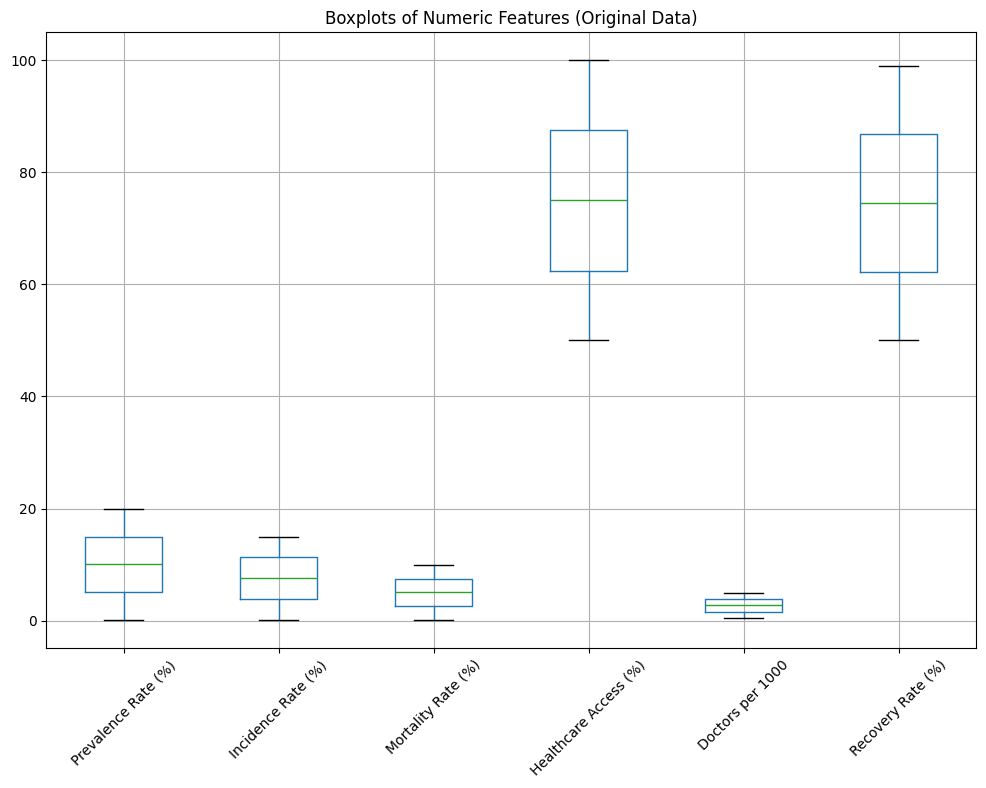

In [41]:
# Assuming df_original is your original DataFrame (before normalization)
numeric_feature = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Healthcare Access (%)', 'Doctors per 1000', 'Recovery Rate (%)']

# Plot boxplots for original data
plt.figure(figsize=(12, 8))
df[numeric_feature].boxplot()
plt.title('Boxplots of Numeric Features (Original Data)')
plt.xticks(rotation=45)
plt.show()

<h2>Identify Missing Value</h2>



In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values (example: fill with mean)
df.fillna(df.mean(), inplace=True)

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


<h2>Identify Outliers</h2>

In [ ]:
# Function to identify outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in a specific column (e.g., Mortality Rate)
outliers = detect_outliers('Mortality Rate (%)')
print(outliers)

<h2>Identify and Discuss Important Features</h2>

In [ ]:
# Correlation with target variable
correlation_with_target = df[numeric_features].corr()['Mortality Rate (%)'].sort_values(ascending=False)
print(correlation_with_target)

# Correlation with target variable
correlation_with_target = df[numeric_features].corr()['Mortality Rate (%)'].sort_values(ascending=False)
print(correlation_with_target)